In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


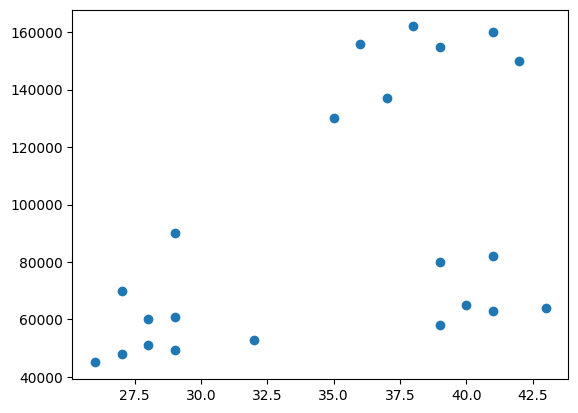

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


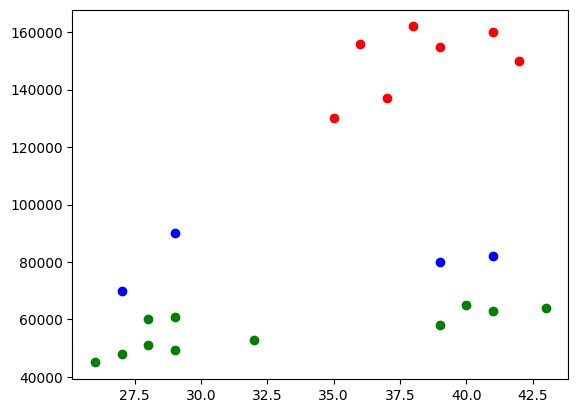

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

the blue and green data are not grouped correctly.this happened due to lack of scaling


Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

for scaling we can use minmax scaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
scaler.fit(df[['Age']])
df['Income($)']= scaler.transform(df[['Income($)']])

MinMaxScaler()

In [ ]:
df['Age']= scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
 km=KMeans(n_clusters=3)
 y_predicted=km.fit_predict(df[['Age','Income($)']])
 y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


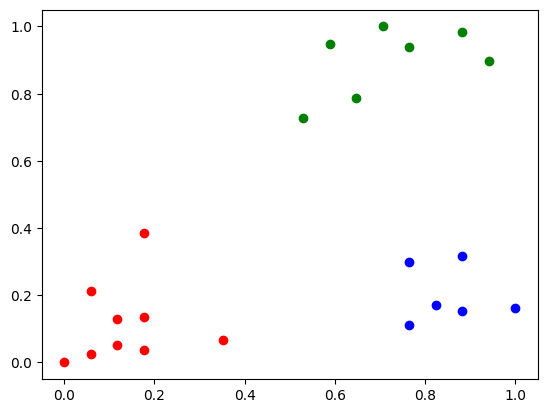

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

In [ ]:
#centroid points

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

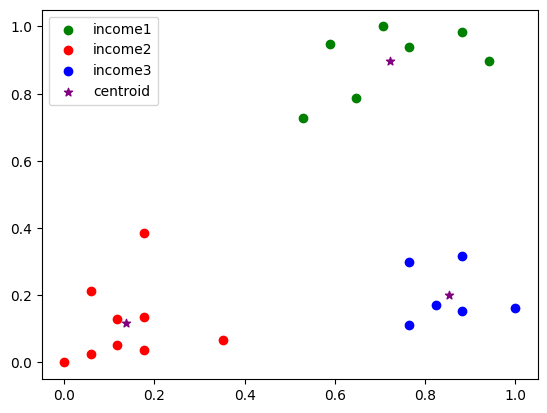

In [ ]:
plt.scatter(df1.Age,df1['Income($)'],color='green',label='income1')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='income2')
plt.scatter(df3.Age,df3['Income($)'],color='blue',label='income3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age',"Income($)"]])
  sse.append(km.inertia_)

In [ ]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2766936276300279,
 0.2203764169077067,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620906]

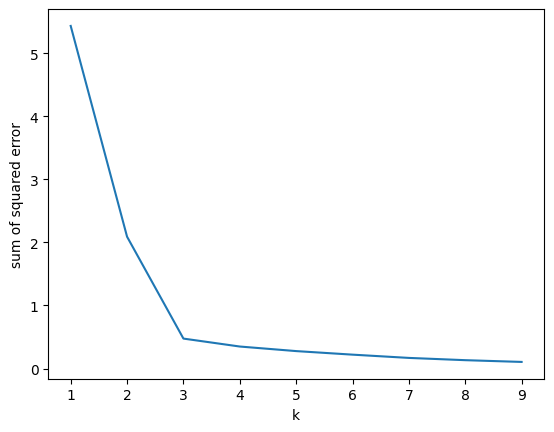

In [ ]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data[:4,2:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2]])

In [ ]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(data=iris.data[:,2:],columns=iris.feature_names[2:])
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


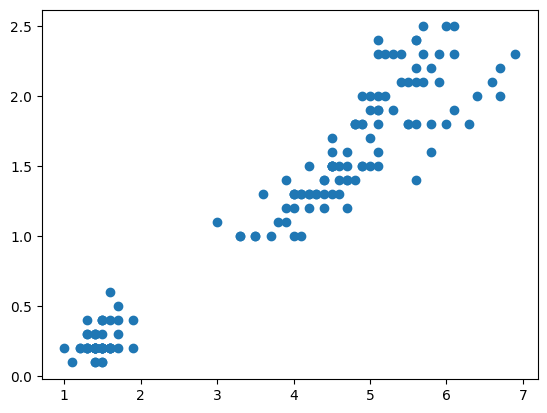

In [ ]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2


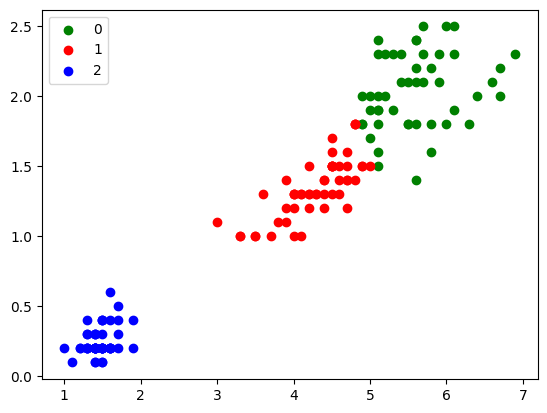

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label='0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label='1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',label='2')
plt.legend()

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']= scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']= scaler.transform(df[['petal width (cm)']])

In [ ]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [ ]:
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


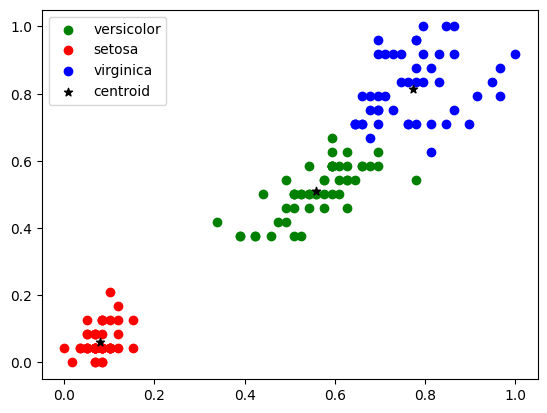

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label='versicolor')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label='setosa')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',label='virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [ ]:
#centroid
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

In [ ]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667124,
 0.8538617353912241,
 0.6801035704886194,
 0.5651273455703979,
 0.4858084553914369,
 0.4364180569012378]

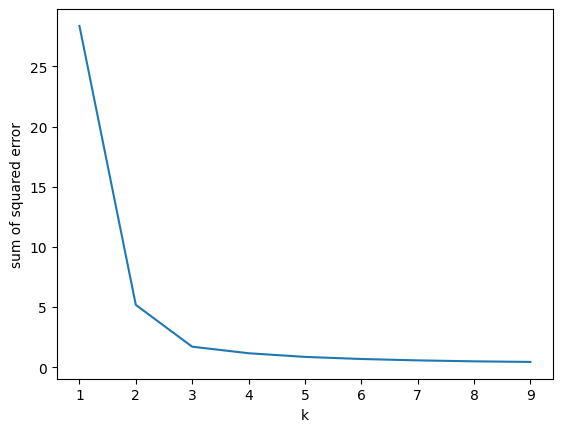

In [ ]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)